In [ ]:
import warnings

import pandas as pd
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt
import seaborn as sns
from array import array

plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
warnings.filterwarnings('ignore')

In [ ]:
users = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/users.dat', sep='::',
                    names=['user_id', 'twitter_id'])

In [ ]:
users.head()

,,,user_id,twitter_id
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455


In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ratings.dat', sep='::',
                      names=['user_id', 'movie_id', 'rating', 'rating_timestamp']
                      ).sort_values("rating_timestamp") # sorting the dataframe by datetime

In [ ]:
ratings["rating_timestamp"] = pd.to_datetime(ratings["rating_timestamp"], unit='s')

In [ ]:
ratings.head()

,user_id,movie_id,rating,rating_timestamp
1000138,6040,858,4,2000-04-25 23:05:32
1000153,6040,2384,4,2000-04-25 23:05:54
999873,6040,593,5,2000-04-25 23:05:54
1000007,6040,1961,4,2000-04-25 23:06:17
1000192,6040,2019,5,2000-04-25 23:06:17


In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movies.dat', sep='::', encoding='latin-1',
                     header=None, names=['movie_id', 'movie_title', 'genres'])

In [ ]:
ratings['rating'].value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: rating, dtype: int64

In [ ]:
ratings['rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [ ]:
f"You have {len(users.user_id.unique())} unique user ids in the data"

'You have 21 unique user ids in the data'

In [ ]:
movies_rating = (ratings
                  .set_index("movie_id")
                  .join(movies.set_index("movie_id"),
                        how="left")
                 )

movies_rating.head(2)

,user_id,rating,rating_timestamp,movie_title,genres
movie_id,,,,,
1,6035,4,2000-04-26 01:34:09,Toy Story (1995),Animation|Children's|Comedy
1,6032,4,2000-04-26 03:02:07,Toy Story (1995),Animation|Children's|Comedy


In [ ]:
dummies = movies_rating['genres'].str.get_dummies()
dummies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
tidy_movie_ratings = (pd.concat([movies_rating, dummies], axis=1)
                       .drop(["rating_timestamp", "genres"], axis=1)
                )

tidy_movie_ratings.head()

,user_id,rating,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,6035,4,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6032,4,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6022,5,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6021,3,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6016,4,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
tidy_movie_ratings["production_year"] = tidy_movie_ratings["movie_title"].str[-5:-1]
tidy_movie_ratings["movie_title"] = tidy_movie_ratings["movie_title"].str[:-7]

In [ ]:
tidy_movie_ratings.reset_index(inplace=True)

tidy_movie_ratings.head(2)

,movie_id,user_id,rating,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,production_year
0,1,6035,4,Toy Story,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995
1,1,6032,4,Toy Story,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995


In [ ]:
condition = tidy_movie_ratings["production_year"].astype(int) < 2021

prodcount = (tidy_movie_ratings[condition][["production_year", "movie_id"]]
             .groupby("production_year")
             .count()
            )

prodcount.tail()

,movie_id
production_year,
1996,59382
1997,65402
1998,68226
1999,86833
2000,41000


<Axes: title={'center': 'Count of Rated Movies - by production year'}, xlabel='production_year'>

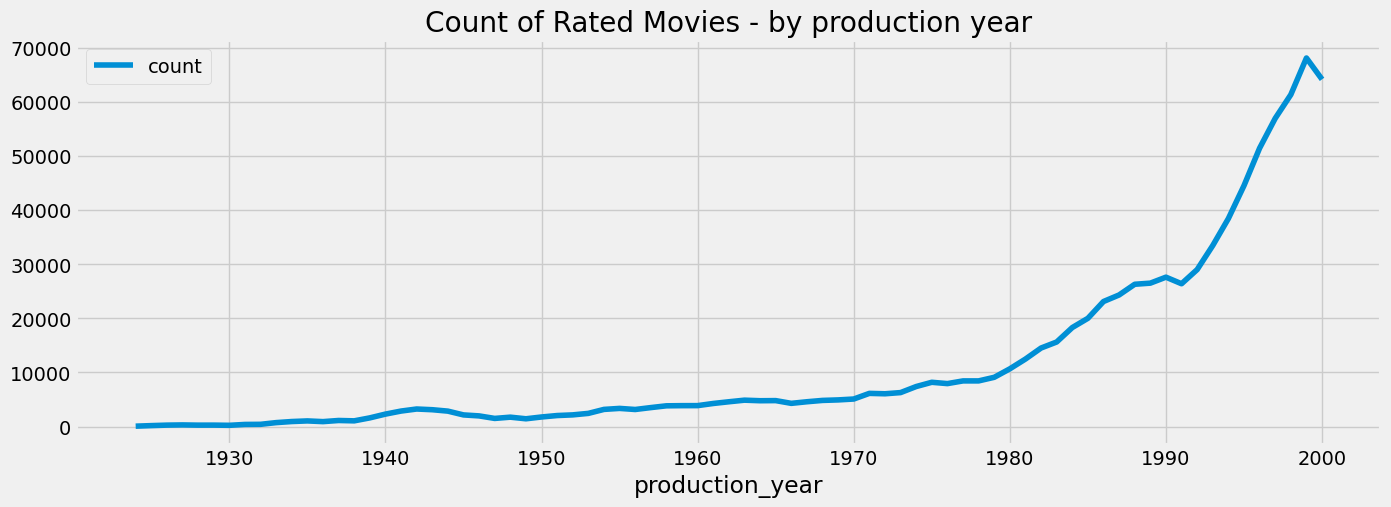

In [ ]:
(prodcount
 .rolling(5).mean().rename(columns={"movie_id":"count"})
 .plot(figsize=(15,5),
       title="Count of Rated Movies - by production year")
)

In [ ]:
top6_genre = (tidy_movie_ratings.iloc[:, 4:-1]
              .sum()
              .sort_values(ascending=False)
              .head(6)
              .index.values
              )

top6_genre

array(['Comedy', 'Drama', 'Action', 'Thriller', 'Sci-Fi', 'Romance'],
      dtype=object)

In [ ]:
my_list = ['Drama', 'Thriller', 'Action', 'Comedy', 'Adventure', 'Sci-Fi']
my_array = np.array(my_list)

print(my_array)

['Drama' 'Thriller' 'Action' 'Comedy' 'Adventure' 'Sci-Fi']


In [ ]:
genre_groups = (tidy_movie_ratings.iloc[:, 4:]
                .groupby("production_year")
                .sum()
               ).loc["2000":"2019", top6_genre] # since 2000

<Axes: title={'center': 'Total Rated Films'}, xlabel='production_year'>

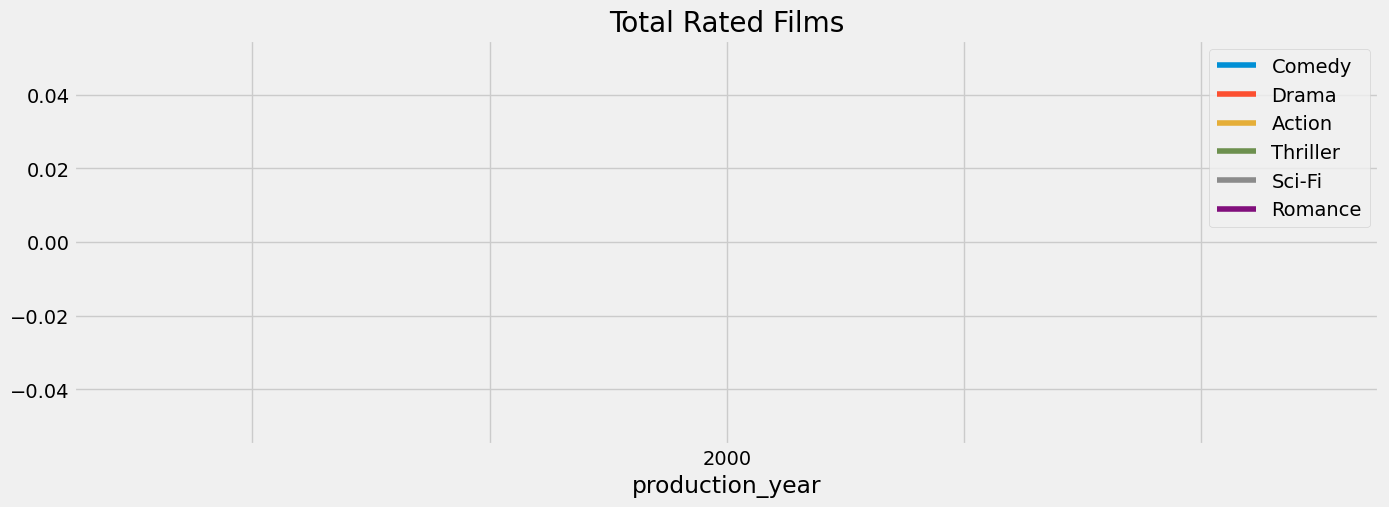

In [ ]:
genre_groups.rolling(2).mean().plot(figsize=(15,5),
                                    title="Total Rated Films")

In [ ]:
cols = ["movie_title", "rating", "production_year", "Sci-Fi", "movie_id"]
condition0 = tidy_movie_ratings["production_year"].astype(int) < 2020
condition1 = tidy_movie_ratings["Sci-Fi"] == 1

scifi = (tidy_movie_ratings
         [cols]
         [condition0 & condition1]
         .drop("Sci-Fi", axis=1)
        )

scifi["decade"] = scifi['production_year'].astype(int)//10*10

scifi.head()

,movie_title,rating,production_year,movie_id,decade
11852,Powder,2,1995,24,1990
11853,Powder,4,1995,24,1990
11854,Powder,4,1995,24,1990
11855,Powder,4,1995,24,1990
11856,Powder,3,1995,24,1990


In [ ]:
count_group = scifi.groupby("movie_id").count()["rating"]

movie_list = count_group[count_group > 10].index.values
movie_list[:5]

array([24, 29, 32, 66, 76])

In [ ]:
my_list = [417, 17136, 21884, 24184, 24216]
my_array = np.array(my_list)
print(my_array)

[  417 17136 21884 24184 24216]


In [ ]:
condition = scifi["movie_id"].isin(movie_list)
columns = ["movie_title", "decade", "rating"]

scifi_filtered = scifi[condition][columns]

In [ ]:
top_rate_by_decade = (scifi_filtered
                     .groupby(["decade", "movie_title"])
                     .mean()
                     .sort_values(["decade", "rating"],
                                                ascending=False)
                     .groupby(level=0, as_index=False)
                     .apply(lambda x: x.head() if len(x) >= 5 else x.head(1))
                     .reset_index(level=0, drop=True)
                    ).round(2)

top_rate_by_decade # Here we can see the movies with their corresponding higher ratings

rating
decade movie_title                                               
1920   Metropolis                                            4.08
1930   Invisible Man, The                                    3.75
1940   Ape, The                                              2.17
1950   Day the Earth Stood Still, The                        4.14
       Forbidden Planet                                      3.98
       Invasion of the Body Snatchers                        3.91
       Thing From Another World, The                         3.90
       War of the Worlds, The                                3.86
1960   Dr. Strangelove or: How I Learned to Stop Worry...    4.45
       2001: A Space Odyssey                                 4.07
       Planet of the Apes                                    3.71
       Night of the Living Dead                              3.67
       Quatermass and the Pit                                3.65
1970   Star Wars: Episode IV - A New Hope                    4.45
       Alien                                                 4.16
       Clockwork Orange, A                                   4.08
       Close Encounters of the Third Kind                    4.01
       Sleeper                                               3.98
1980   Star Wars: Episode V - The Empire Strikes Back        4.29
       Blade Runner                                          4.27
       Terminator, The                                       4.15
       Aliens                                                4.13
       Brazil                                                4.10
1990   Matrix, The                                           4.32
       Ghost in the Shell (Kokaku kidotai)                   4.09
       City of Lost Children, The                            4.06
       Terminator 2: Judgment Day                            4.06
       Delicatessen                                          4.00
2000   X-Men                                                 3.82
       Space Cowboys                                         3.38
       Titan A.E.                                            3.38
       Pitch Black                                           3.30
       Cell, The                                             3.26